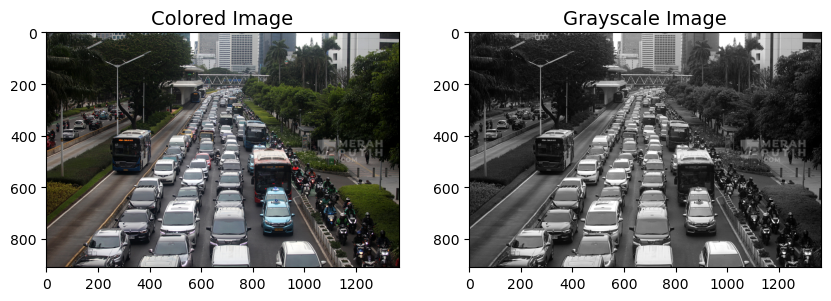

In [118]:
import numpy as np
from skimage.io import imread, imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

sample = imread('mobil.jpg')
sample_g = rgb2gray(sample)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(sample)
ax[1].imshow(sample_g, cmap='gray')

ax[0].set_title('Colored Image', fontsize=14)
ax[1].set_title('Grayscale Image', fontsize=14)

plt.show()

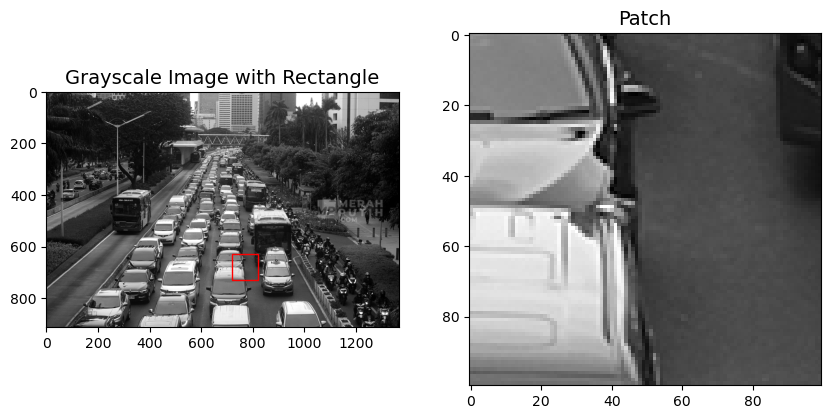

In [119]:
x = 720
y = 630
height = 100
width = 100
x1 = x + height
y1 = y + width

from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(sample_g, cmap='gray')
ax[0].add_patch(Rectangle((x, y), height, width, edgecolor='red', facecolor='none'))
ax[0].set_title('Grayscale Image with Rectangle', fontsize=14)

patch = sample_g[y:y1, x:x1]
ax[1].imshow(patch, cmap='gray')
ax[1].set_title('Patch', fontsize=14)
plt.show()

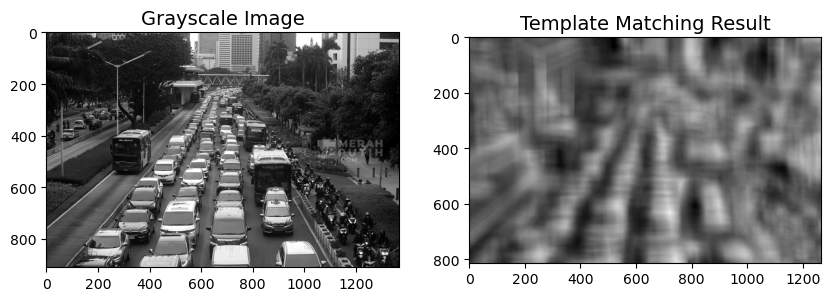

In [120]:
from skimage.feature import match_template

sample_mt = match_template(sample_g, patch)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(sample_g, cmap='gray')
ax[1].imshow(sample_mt, cmap='gray')
ax[0].set_title('Grayscale Image', fontsize=14)
ax[1].set_title('Template Matching Result', fontsize=14)
plt.show()


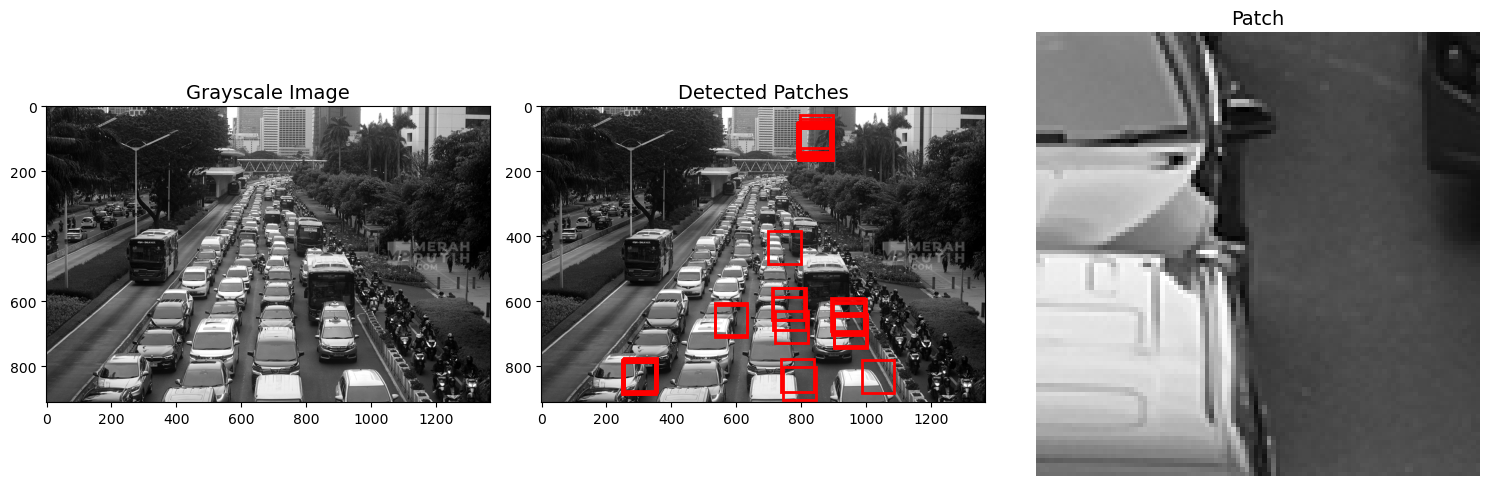

In [121]:
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(sample_g, cmap='gray')
ax[1].imshow(sample_g, cmap='gray')

patch_height, patch_width = patch.shape  # patch.shape = (height, width)

# Simpan satu patch untuk ditampilkan di ax[2]
patch_to_show = None

for (y, x) in peak_local_max(sample_mt, threshold_abs=0.6):
    rect = Rectangle((x, y), patch_width, patch_height, edgecolor='red', facecolor='none', linewidth=2)
    ax[1].add_patch(rect)
    # Ambil patch pertama yang terdeteksi untuk ditampilkan
    if patch_to_show is None:
        patch_to_show = sample_g[y:y+patch_height, x:x+patch_width]

ax[0].set_title('Grayscale Image', fontsize=14)
ax[1].set_title('Detected Patches', fontsize=14)

if patch_to_show is not None:
    ax[2].imshow(patch_to_show, cmap='gray')
    ax[2].set_title('Patch', fontsize=14)
    ax[2].axis('off')
else:
    ax[2].set_visible(False)

plt.tight_layout()
plt.show()